In [1]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
df = pd.read_csv('keys.csv')

In [3]:
# get twitter keys
api_key = df['key'][0].strip()
s_key = df['key'][1].strip()
access_token = df['key'][3].strip()
access_token_s = df['key'][4].strip()

In [4]:
# create the authentification object
auth = tweepy.OAuthHandler(api_key, s_key)

# set access token
auth.set_access_token(access_token, access_token_s)

# create the API object
api = tweepy.API(auth, wait_on_rate_limit = True)

In [5]:
# extract 100 tweets from bill G
posts = api.user_timeline(screen_name = 'IvanOnTech', count = 100, lang = 'en', tweet_mode = 'extended')

# print the last 5 tweets from bill
print('show the 5 recent tweets: \n')
i = 1
for tweet in posts[0:5]:
    print(str(i) + ') ' + tweet.full_text + '\n')
    i += 1

show the 5 recent tweets: 

1) RT @Academy_IOT: How To Earn A Passive Income With DeFi

Although Bitcoin is hitting the headlines, understanding how to make a passive inc…

2) RT @IvanOnTech: PROOF OF DOG!!!!!!!!! https://t.co/RjMCnmj4Lo

3) RT @LizBitcoin: He has stolen my ❤️

And I’m a dog mom!!!😍 https://t.co/Hn2xSKy5vQ

4) @jjmarriott 😁😁😁 thanks Jonathan!

5) RT @scoinaldo: Not gonna lie, but the market looks bullish af to me right now.

Either $BTC and $ETH are about to explode next week.

Or th…



In [6]:
# create the df for the tweets
df = pd.DataFrame([tweet.full_text for tweet in posts], columns = ['Tweets'])

df.head()

,Tweets
0,RT @Academy_IOT: How To Earn A Passive Income ...
1,RT @IvanOnTech: PROOF OF DOG!!!!!!!!! https://...
2,RT @LizBitcoin: He has stolen my ❤️\n\nAnd I’m...
3,@jjmarriott 😁😁😁 thanks Jonathan!
4,"RT @scoinaldo: Not gonna lie, but the market l..."


In [7]:
# clean the text
def cleanText(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) # remove the @mentions
    text = re.sub(r'#', '', text) # remove the hashtags
    text = re.sub(r'RT[\s]+', '', text) # remove the retweets
    text = re.sub(r'https?:\/\/\S+', '', text) # remove hyperlinks
    
    return text

# appy the function to clean the posts
df['Tweets'] = df['Tweets'].apply(cleanText)

# show df
df

,Tweets
0,_IOT: How To Earn A Passive Income With DeFi\n...
1,: PROOF OF DOG!!!!!!!!!
2,: He has stolen my ❤️\n\nAnd I’m a dog mom!!!😍
3,😁😁😁 thanks Jonathan!
4,": Not gonna lie, but the market looks bullish ..."
...,...
95,Reason of the dump??
96,Yep exited long trading positions at $18.5k \...
97,_2 Yep 100%
98,During bull markets - important to be bull bia...


In [8]:
# create a function to get the subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

# create a function to get the polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity
    
# create two new columns therefore
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

# show the df
df

,Tweets,Subjectivity,Polarity
0,_IOT: How To Earn A Passive Income With DeFi\n...,0.000000,0.000000
1,: PROOF OF DOG!!!!!!!!!,0.000000,0.000000
2,: He has stolen my ❤️\n\nAnd I’m a dog mom!!!😍,0.000000,0.000000
3,😁😁😁 thanks Jonathan!,0.200000,0.250000
4,": Not gonna lie, but the market looks bullish ...",0.267857,0.142857
...,...,...,...
95,Reason of the dump??,0.000000,0.000000
96,Yep exited long trading positions at $18.5k \...,0.400000,-0.050000
97,_2 Yep 100%,0.000000,0.000000
98,During bull markets - important to be bull bia...,0.500000,0.200000


<function matplotlib.pyplot.show(*args, **kw)>

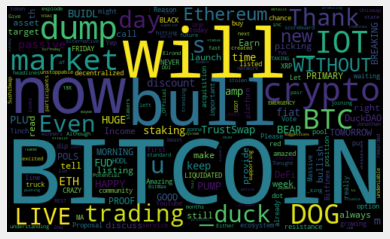

In [9]:
# plot the wordcloud
allWords = ' '.join( [tweets for tweets in df['Tweets']])
wordCloud = WordCloud(width = 500, height = 300, random_state = 21, max_font_size = 119).generate(allWords)

plt.imshow(wordCloud, interpolation = 'bilinear')
plt.axis('off')
plt.show

In [10]:
# create a function to compute the negative, neutral and positiv analysis
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'
    
df['Analysis'] = df['Polarity'].apply(getAnalysis)

# show df
df

,Tweets,Subjectivity,Polarity,Analysis
0,_IOT: How To Earn A Passive Income With DeFi\n...,0.000000,0.000000,Neutral
1,: PROOF OF DOG!!!!!!!!!,0.000000,0.000000,Neutral
2,: He has stolen my ❤️\n\nAnd I’m a dog mom!!!😍,0.000000,0.000000,Neutral
3,😁😁😁 thanks Jonathan!,0.200000,0.250000,Positive
4,": Not gonna lie, but the market looks bullish ...",0.267857,0.142857,Positive
...,...,...,...,...
95,Reason of the dump??,0.000000,0.000000,Neutral
96,Yep exited long trading positions at $18.5k \...,0.400000,-0.050000,Negative
97,_2 Yep 100%,0.000000,0.000000,Neutral
98,During bull markets - important to be bull bia...,0.500000,0.200000,Positive


In [11]:
# print all of the positiv tweets
sortedDF = df.sort_values(by = ['Polarity'])

j = 1
for i in range(sortedDF.shape[0]):
    if df['Analysis'][i] == 'Positive':
        print(str(j) + ') ' + sortedDF['Tweets'][i])
        print()
        j += 1


1)  😁😁😁 thanks Jonathan!

2) : Not gonna lie, but the market looks bullish af to me right now.

Either $BTC and $ETH are about to explode next week.

Or th…

3) _Official: BitMax is excited to announce the PRIMARY listing of _virtua under the trading pair of TVK/USDT. A standard a…

4) _duck: DuckDAO is unstoppable, picking winners left and right!

Thank you ⁦⁩ for supporting ⁦_duck⁩ since day 1

$DDI…

5) : Tonight I will be joining  LIVE on , to discuss Elrond, Bitcoin, state of crypto, and the future of th…

6) : $POLS is such a beast.

Even months after the launch it‘s still the 2nd most trending asset on  🔥

As I am always…

7) : Give us your best name suggestions   🐶

8) DOG CONFIRMED!!!
Picking up Sunday

What should we call him????
Vitalik maybe? CC 

9) : $PLU keeps on pushing!  listing is very promising, now you can read all the details about it👇🏻🤩 

10) : Did  just tell the entire world the  protocol &amp; stable coins are superior to any other payments system on…

11) Happy

In [12]:
# print the negativ prints
sortedDF = df.sort_values(by = ['Polarity'], ascending = False)

j = 1
for i in range(sortedDF.shape[0]):
    if df['Analysis'][i] == 'Negative':
        print(str(j) + ') ' + sortedDF['Tweets'][i])
        print()
        j += 1

1) EMERGENCY!!!!

NO GOOD MORNING CRYPTO TOMORROW!!

TAKING REST ❤️🙏

2) BITCOIN BREAKING DOWN!!!!

Potential fast target - $18K 

3) : Only in crypto,

Marketing = Bad 😅 

4) BITCOIN CRAZY ANIMAL!!!

Dumps to 18,000

RECOVERS WITHOUT EVEN BLINKING!!!

5) : 🔴 My fellow bitcoiners, the bull market is upon us. Like clockwork November red dot closed above all other red dots ..…

6) GREEN BAGS!! 

7) _duck: 🛍 DUCKDAO BLACK FRIDAY OFFER 🛍

Black Friday is everywhere.....also for the Ducks 🐥

100% BONUS ON DDIM or 50% discount on Me…

8) There is no light without darkness
There is no joy without sadness

THERE IS NO PUMP WITHOUT DUMP!!!!

BUYING THE DIPPPPPP
poetic

9) CRYPTO WILL KEEP DUMPING!!!

AND THEN CRAZY PUMPIIIING!!

10)  Yep exited long trading positions at $18.5k 

HODL position untouched (as per definition)



In [16]:
# print the neutral prints
sortedDF = df.sort_values(by = ['Polarity'])

j = 1
for i in range(sortedDF.shape[0]):
    if df['Analysis'][i] == 'Neutral':
        print(str(j) + ') ' + sortedDF['Tweets'][i])
        print()
        j += 1

1) _IOT: How To Earn A Passive Income With DeFi

Although Bitcoin is hitting the headlines, understanding how to make a passive inc…

2) : PROOF OF DOG!!!!!!!!! 

3) : He has stolen my ❤️

And I’m a dog mom!!!😍 

4)  🤩🤩🤩

5)  🙏😁😁

6) _king 😁😁

7) PROOF OF DOG!!!!!!!!! 

8) :  The scoreboard is undeniable.

 

9) : SushiSwap was created as an alternative to Uniswap that rewarded network participants and token stakers.

Now, TrustSwap's u…

10)  

11) 😅😅😅 

12)   😂😂

13) _IOT: Fiat = modern-day slavery?

 

14) _IOT: YFDAI Finance seeks to provide a full-on DeFi ecosystem that combines lending and borrowing, staking and farming services,…

15) _trail: We are amazed again and again by the creativity and ingenuity of the OriginTrail Tracers community! 🤯💥 Another OriginTra…

16) : I'm forever amazed at the sense of entitlement some people display on this platform. 

I don't owe you:
- My time
- My attent…

17) : The TrustSwap ecosystem is now growing at an exponential pace.

 covers our rec

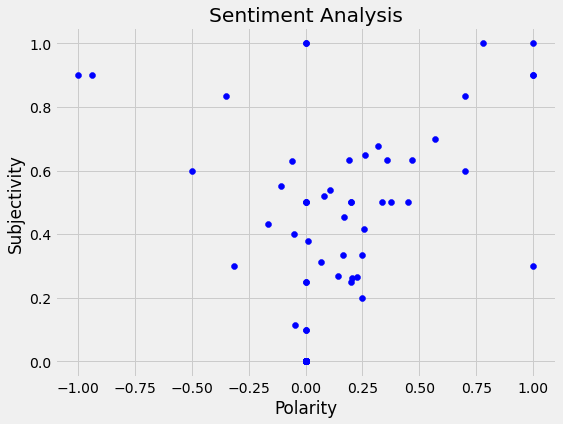

In [14]:
# plot the polarity
plt.figure(figsize = (8, 6))
for i in range(df.shape[0]):
    plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color = 'Blue')
    
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

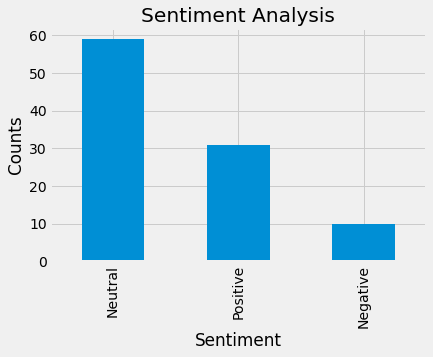

In [15]:
# show the value counts

df['Analysis'].value_counts()

#plot the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')

df['Analysis'].value_counts().plot(kind = 'bar')
plt.show()